<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Defining-everything" data-toc-modified-id="Defining-everything-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Defining everything</a></span><ul class="toc-item"><li><span><a href="#Importing-modules" data-toc-modified-id="Importing-modules-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Importing modules</a></span></li><li><span><a href="#Defining-the-functions" data-toc-modified-id="Defining-the-functions-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Defining the functions</a></span></li><li><span><a href="#Solving-the-problem" data-toc-modified-id="Solving-the-problem-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Solving the problem</a></span></li></ul></li><li><span><a href="#Creating-animation" data-toc-modified-id="Creating-animation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating animation</a></span><ul class="toc-item"><li><span><a href="#Lorenz-system" data-toc-modified-id="Lorenz-system-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Lorenz system</a></span></li><li><span><a href="#Chen-system" data-toc-modified-id="Chen-system-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Chen system</a></span></li><li><span><a href="#Nose-Hoover-Oscillator" data-toc-modified-id="Nose-Hoover-Oscillator-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Nose-Hoover Oscillator</a></span></li><li><span><a href="#Sprott-Jafari-system" data-toc-modified-id="Sprott-Jafari-system-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Sprott-Jafari system</a></span></li></ul></li></ul></div>

# 4th Order Runge-Kutta

We are going to use the fourth order Runge-Kutta method (RK4 for short) in order to solve the problem defined below:

"Assuming input of $n=3$ or $4$, $T>0$ (along with a natural number $M$ that defines the partition of $[0,T]$ into $M$ parts), the functions $f_1,\dots,f_n: \mathbb{R}^n \rightarrow \mathbb{R}$ and the initial values $\{x_1(0),\dots,x_n(0)\}$, solve and visualize the solutions of the system

\begin{equation*}
\left\{
\begin{aligned}
\dot{x_1} &= f_1(x_1,\dots,x_n) \\
          & \; \; \vdots\\
\dot{x_n} &= f_n(x_1,\dots,x_n), \\
\end{aligned}
\right.
\end{equation*}

where all state variables $x_1, \dots, x_n$ are depended on the time $t$ with $t \in [0,T]$."

## Defining everything

### Importing modules

We start by importing the modules that we will use

In [1]:
import numpy as np
import sympy as sym
import math
from matplotlib import pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

If one or more modules are missing you can just type the code below in order to install a pip package in the current Jupyter kernel. For example, if numpy is missing, then we can use

### Defining the functions

#### Starter functions

##### (a) my_symbols function

Symbolic computations are done with symbols and SymPy variables are objects of Symbols class. Therefore, for our problem, We have to define a function that returns symbols of the form $(u_1,u_2,u_3)$ (similarly $(u_1,u_2,u_3,u_4)$, if $n=4$) in order to form the variables for our problem.

In [2]:
def my_symbols(n):
    if n == 3:
        x = sym.symbols("x1:4")
    if n == 4:
        x = sym.symbols("x1:5")
    return x

##### (b) my_matrix_function

As the user only inputs the functions $f_1,\dots,f_n$, we need to define a function that returns the matrix that contains the these functions,  
namely $f(x_1,\dots,x_n)=[ \; f_1(x_1,\dots,x_n) \; \cdots \; f_n(x_1,\dots,x_n) \, ]^T$.

In [3]:
def my_matrix_function(functions):
    #input: the functions f_1, ..., f_n

    list_of_functions = []
    for function in functions:
        list_of_functions.append(function)

    #the list above is made into a numpy array
    matrix_function = np.array(list_of_functions)

    #f is a column, so we need the transpose of the previous result
    matrix_function = np.transpose(matrix_function)

    #finally f is made into a SymPy matrix so that we can define it for different values of the variables
    matrix_function = sym.Matrix(matrix_function)

    return matrix_function

#### One instance Runge-Kutta functions

Lets assume that we are on the $k$th iteration of the RK4.  
We define two functions, one for $n=3$ and one for $n=4$, that use the 4th order Runge-Kutta formula to give us the next value $X^{k+1}$, after we have inputed the previous value $X^{k}$. The RK4 formula is 

$$X^{k+1} = X^k + \frac{h}{6} \cdot \left[ K_1 + 2K_2 + 2K_3 + K_4 \right],$$ with  
$X^k = [ \; x_1^k \, \cdots \, x_n^k \, ]^T$, $f([X^k]^T)=[ \; f_1([X^k]^T), \, \dots \, , f_n([X^k]^T) \, ]^T$ and $K_1 = f([X^k]^T), K_2 = f([X^k]^T + \frac{h}{2} K_1), K_3 = f([X^k]^T + \frac{h}{2} K_2), K_4 = f([X^k]^T + h K_3)$.

In [4]:
#Case n=3
def fourthOrderRungeKutta3(variables,matrix_function_lamb,h,previous_values):
    #INPUT: the variables, the matrix_function defined previously after it has been "lambdified", the step-size h
    # and the previous_values X^k=(x_1^k, ..., x_3^k)^T

    #calculating K1
    K1 = matrix_function_lamb(previous_values[0],previous_values[1],previous_values[2])

    #calculating K2
    K2 = matrix_function_lamb(previous_values[0]+(h/2)*K1[0][0],previous_values[1]+(h/2)*K1[1][0],previous_values[2]+(h/2)*K1[2][0])

    #calculating K3
    K3 = matrix_function_lamb(previous_values[0]+(h/2)*K2[0][0],previous_values[1]+(h/2)*K2[1][0],previous_values[2]+(h/2)*K2[2][0])

    #calculating K4
    K4 = matrix_function_lamb(previous_values[0]+h*K3[0][0],previous_values[1]+h*K3[1][0],previous_values[2]+h*K3[2][0])

    #we transform the tuple previous_values into a numpy array in the form of a column
    previous_values = np.array(previous_values)[np.newaxis]
    previous_values = np.transpose(previous_values)

    #we use all the above to calculate the next_values X^{k+1}=(x_1^{k+1}, ..., x_3^{k+1}) from the formula
    # and later transform them into a tuple
    next_values = previous_values + (h/6)*(K1+2*K2+2*K3+K4)
    next_values = np.transpose(next_values)
    next_values = next_values[0]
    next_values = tuple(next_values)

    return next_values

In [5]:
#Case n=4
def fourthOrderRungeKutta4(variables,matrix_function_lamb,h,previous_values):
    #INPUT: the variables, the matrix_function defined previously after it has been "lambdified", the step-size h
    # and the previous_values X^k=(x_1^k, ..., x_4^k)^T 

    #calculating K1
    K1 = matrix_function_lamb(previous_values[0], previous_values[1],previous_values[2],previous_values[3])

    #calculating K2
    K2 = matrix_function_lamb(previous_values[0]+(h/2)*K1[0][0],previous_values[1]+(h/2)*K1[1][0],previous_values[2]+(h/2)*K1[2][0],previous_values[3]+(h/2)*K1[3][0])

    #calculating K3
    K3 = matrix_function_lamb(previous_values[0]+(h/2)*K2[0][0],previous_values[1]+(h/2)*K2[1][0],previous_values[2]+(h/2)*K2[2][0],previous_values[3]+(h/2)*K2[3][0])

    #calculating K4
    K4 = matrix_function_lamb(previous_values[0]+h*K3[0][0],previous_values[1]+h*K3[1][0],previous_values[2]+h*K3[2][0],previous_values[3]+h*K3[3][0])

    #we transform the tuple previous_values into a numpy array in the form of a column
    previous_values = np.array(previous_values)[np.newaxis]
    previous_values = np.transpose(previous_values)

    #we use all the above to calculate the next_values X^{k+1}=(x_1^{k+1}, ..., x_4^{k+1} from the formula
    #and later transform them into a tuple
    next_values = previous_values + (h/6)*(K1+2*K2+2*K3+K4)
    next_values = np.transpose(next_values)
    next_values = next_values[0]
    next_values = tuple(next_values)

    return next_values

### Solving the problem

We have defined all functions needed to create the main function of the method, named "RK4_function".  
The inputs of this function will be the user inputs defined in the problem and the output of this function will be a list of n-dimensional tuples which constitute the solution of the system through time.

In [6]:
def RK4_function(variables, functions, previous_values, T, M):
 
    #from user inputs T and M, we calculate the step-size h
    h = T/M

    #we define the list of solutions which at start only includes the starting values at t=0
    solutions_list = [previous_values]

    #we use the second starter function to form the matrix function for the problem
    matrix_function = my_matrix_function(functions)

    #At this point, we branch out to two cases, depending on n
    #Case n=3
    if len(variables) == 3:
    
        #The lambdify function translates SymPy expressions into Python functions
        #in our case, this means that matrix_function_lamb can be given values for (x_1, x_2, x_3)
        matrix_function_lamb = sym.lambdify((x1,x2,x3),matrix_function)

        #the one instance RK function for n=3 has to be iterated for all instances k=0, ...,M
        #also, in python:  x in range(0,r+1) <=> x=0,1,...,r
        for z in range(0,M+1):
            previous_values = fourthOrderRungeKutta3(variables,matrix_function_lamb,h,previous_values)
            solutions_list.append(previous_values)

    #Case n=4
    if len(variables) == 4:
        matrix_function_lamb = sym.lambdify((x1,x2,x3,x4),matrix_function)
        for z in range(0,M+1):
            previous_values = fourthOrderRungeKutta4(variables,matrix_function_lamb,h,previous_values)
            solutions_list.append(previous_values)

    return solutions_list

## Creating animation

First we will import the modules that we need and create a function that will be used for animations.  
For this application, we would like to use the 4th order Runge-Kutta method, in order to create an animation of the solutions of the system in time $[0,T]$, using "matplotlib" and "matplotlib.animation".  
-All previous functions need to be on the kernel in order to use them in this example-

In [7]:
#we need these for the animation
import matplotlib.animation as animation
from IPython import display

#this line is crucial for the animation to work and be interactive
%matplotlib notebook

In [8]:
def animateRK4(variables, functions, previous_values, T, M):

    #we find the list of the solutions using the main function
    solutions = RK4_function(variables, functions, previous_values, T, M)

    #plotting

    #with this command one can change the style of the plot (reminder: plt = pyplot)
    plt.style.use('classic')

    #in order to add our values into the figure, we split each solution in its variable
    x_plot = []
    y_plot = []
    z_plot = []
    for sol in solutions:
        x_plot.append(sol[0])
        y_plot.append(sol[1])
        z_plot.append(sol[2])

    # ==============================================================
    # initial conditions of (x1, x2, x3) at t = 0
    y0 = np.array(previous_values)

    # ==============================================================
    # propagate state

    # simulation results
    state_history = []

    # initialize yk
    yk = y0

    # intialize time
    t = 0

    # iterate over time
    h = T/M 
    for t in range(0,M,1):
        # save current state
        state_history.append(yk)

        # update state variables yk to yk+1
        list_xyz = []
        list_xyz.append(x_plot[t])
        list_xyz.append(y_plot[t])
        list_xyz.append(z_plot[t])
        yk = np.array(list_xyz)

    # convert list to numpy array
    state_history = np.array(state_history)

    # ==============================================================
    # plot history

    fig = plt.figure()  # figsize=(10, 8)
    ax = plt.axes(projection='3d')
    ax.set_xlim3d(min(state_history[:, 0]) - 0.05, max(state_history[:, 0]) + 0.05)
    ax.set_ylim3d(min(state_history[:, 1]) - 0.05, max(state_history[:, 1]) + 0.05)
    ax.set_zlim3d(min(state_history[:, 2]) - 0.05, max(state_history[:, 2]) + 0.05)

    # trajectory data to plot
    trajectory, = ax.plot([], [], [], linewidth=0.6, color = "red")

    ax.set(xlabel='X', ylabel='Y', zlabel='Z')
    ax.xaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
    ax.yaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
    ax.zaxis.set_pane_color((0.25, 0.25, 0.2, 0.4))
    ax.grid()

    def animate(i):
        # update axis view angle
        i -= M * (i//M)

        # update trajectory for current time step
        trajectory.set_data(state_history[:i, 0], state_history[:i, 1])
        trajectory.set_3d_properties(state_history[:i, 2])
        return trajectory,


    # show animation

    anim = animation.FuncAnimation(fig, animate, frames=10000, 
                                       interval=1, blit=False)
    
    return anim

### Lorenz system

We remind again the chaotic Lorenz system

$$\left\{
\begin{aligned}
\frac{dx_1}{dt} &= \sigma(x_2-x_1) \\[0.5ex]
\frac{dx_2}{dt} &= x_1(\rho-x_3)-x_2 \\[0.5ex]
\frac{dx_3}{dt} &= x_1x_2-\beta x_3, \\[1.5ex]
\end{aligned}
\right.$$

with $\sigma = 10, \; \rho = 28 \text{ and } \beta = 2.667$.

<IPython.core.display.Javascript object>


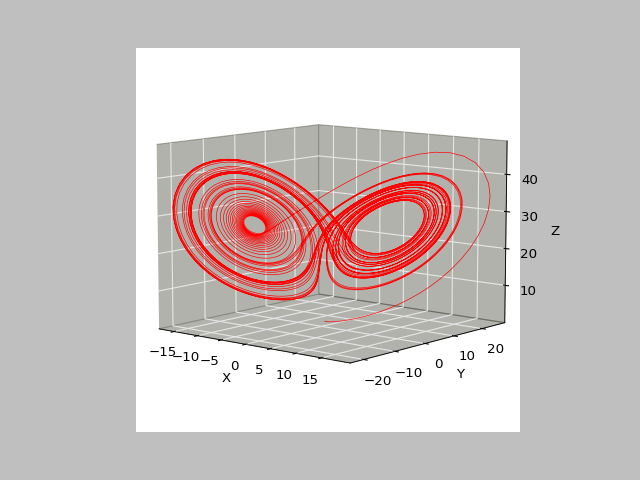

In [9]:
#user input, namely : T,M,n,functions,previous values
T = 100 #t is in [0,T]
M = 10000 #[0,T] is discretized in M equal parts
n=3 #the dimension of the system

(x1,x2,x3) = my_symbols(n) #needs to run after n input // the first starter function is used to form the three variables
variables = (x1,x2,x3) #needs to run after x_i creation

s, r, b = 10, 28, 2.667 #values for the parameters of the system
functions = (s*x2-s*x1, r*x1-x1*x3-x2, x1*x2-b*x3)
previous_values = (0,1,1)
#end of user input

animateRK4(variables, functions, previous_values, T, M)

### Chen system

We remind the system
$$\left\{
\begin{aligned}
\dot{x} &= a(y-x) \\
\dot{y} &= (c-a)x-xz+cy \\
\dot{z} &= xy-bz, \\
\end{aligned}
\right.$$
with $a=40$, $b=3$ and $c=28$.

<IPython.core.display.Javascript object>


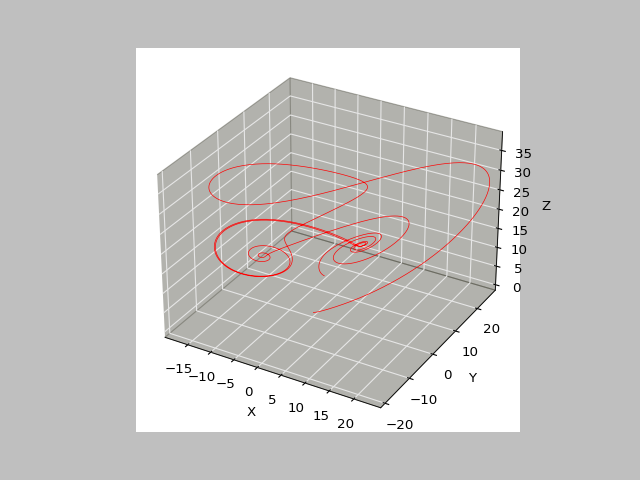

In [10]:
#user input, namely : T,M,n,functions,previous values
T = 100 #t is in [0,T]
M = 100000 #[0,T] is discretized in M equal parts
n=3 #the dimension of the system

(x1,x2,x3) = my_symbols(n) #needs to run after n input // the first starter function is used to form the three variables
variables = (x1,x2,x3) #needs to run after x_i creation

a, c, b = 40, 28, 3
functions = (a*(x2-x1), (c-a)*x1 - x1*x3 + c*x2, x1*x2 - b*x3)
previous_values = (-0.1, 0.5, -0.6)
#end of user input

animateRK4(variables, functions, previous_values, T, M)

### Nose-Hoover Oscillator

We remind the system
$$\left\{
\begin{aligned}
\dot{x} &= y \\
\dot{y} &= -x-yz \\
\dot{z} &= (y^2-1)/q, \\
\end{aligned}
\right.$$
with $q=10$.

<IPython.core.display.Javascript object>


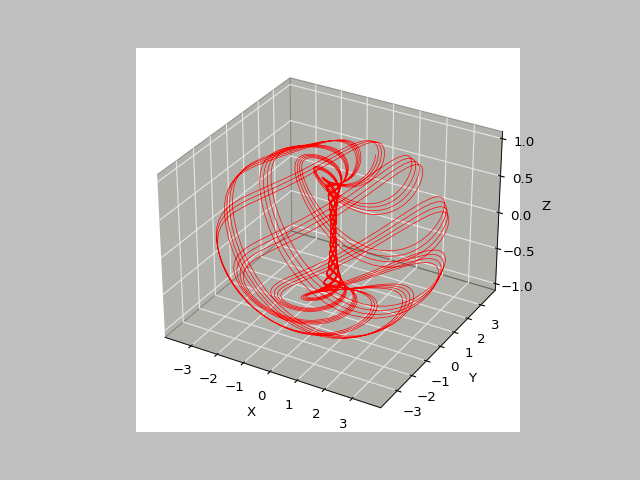

In [11]:
#user input, namely : T,M,n,functions,previous values
T = 1000 #t is in [0,T]
M = 10000 #[0,T] is discretized in M equal parts
n=3 #the dimension of the system

(x1,x2,x3) = my_symbols(n) #needs to run after n input // the first starter function is used to form the three variables
variables = (x1,x2,x3) #needs to run after x_i creation

q=10
functions = (x2, -x1 -x2*x3, (x2**2-1) / q)
previous_values = (1,1,1)
#end of user input

animateRK4(variables, functions, previous_values, T, M)

### Sprott-Jafari system

Finally, we remind

$$\left\{
\begin{aligned}
\dot{x} &= y \\
\dot{y} &= -x+yz \\
\dot{z} &= z+ax^2-y^2-b, \\
\end{aligned}
\right.$$
with $a=8.894$ and $b=4$.

<IPython.core.display.Javascript object>


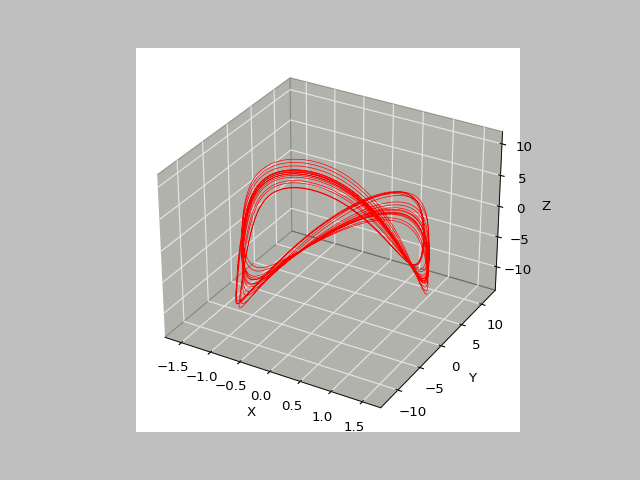

In [12]:
#user input, namely : T,M,n,functions,previous values
T = 100 #t is in [0,T]
M = 10000 #[0,T] is discretized in M equal parts
n=3 #the dimension of the system

(x1,x2,x3) = my_symbols(n) #needs to run after n input // the first starter function is used to form the three variables
variables = (x1,x2,x3) #needs to run after x_i creation

a, b = 8.894, 4 #b=4
functions = (x2,-x1+x2*x3,x3+a*x1**2-x2**2-b)
previous_values = (0,3.8,0.7)
#end of user input

animateRK4(variables, functions, previous_values, T, M)